# Importing Libraries

In [4]:
from pylab import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [5]:
df = pd.read_csv(r'D:\Desktopfiles\Netflix\netflix_titles.csv')

In [ ]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Data Pre-processing

## Removing unnecessary columns

In [6]:
#show_id is not required for data analysis
df.drop(['show_id'],axis="columns",inplace=True)

In [7]:
df.columns                      
#show_id has been successfully removed

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.shape

(8807, 11)

In [9]:
df.info()                          #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 757.0+ KB


## Dropping Duplicates

In [10]:
df.drop_duplicates(inplace=True)


In [11]:
df.shape         
#duplicates have been removed.

(8807, 11)

## Data Formatting

In [12]:
#converting date_added column to a more convenient column by replacing the column with the year added 
def extract_year(date):
    if isinstance(date, str) and len(date) >= 4:
        return date[-4:]
    else:
        return date

df['date_added'] = df['date_added'].apply(extract_year)

# Display the DataFrame
df.head()


,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [13]:
df['date_added'].unique()              #All relevant values

array(['2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2009', '2008', nan, '2010'], dtype=object)

In [14]:
df.rename(columns={'date_added':'year_added'},inplace = True)


In [15]:
df.head()                         #Column name has been changed successfully

,type,title,director,cast,country,year_added,release_year,rating,duration,listed_in,description
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [16]:
#Director statistics
df['director'].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

In [17]:
2587/df['director'].size *100     #Since there are huge number of unknown values, all the rows with irrelevant director names are removed.

29.37436130350857

In [18]:
#To avoid false creditation by filling the "Not Given" by any other director's name, it is very important that all the rows with director unknown must be removed. (MCAR - Missing Completley At Random)
df.drop(df[df["director"]=="Not Given"].index,inplace=True)


In [19]:
df.shape

(8807, 11)

In [20]:
M = list(df['title'].unique())
"Not Given" in M                      #Title column doesn't have any irrelevant string

False

In [21]:
df['country'].value_counts()            #There are 287 unknown values.

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [22]:
287/df['country'].size * 100  #Unknown values are less than 10%. So, it can be ignored.

3.2587714318156014

In [23]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

In [25]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [26]:
df['listed_in'].unique()
P = list(df['listed_in'].unique())

# Data Visualization

## Content type -  TV Shows vs Movies




(-1.116548201234971,
 1.1007880095826177,
 -1.1136419241461657,
 1.1114579774648008)

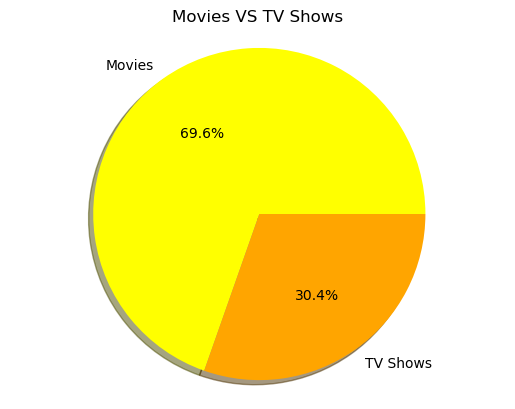

In [27]:
#Pie Chart
labels = ['Movies','TV Shows']
values = df['type'].value_counts()
colors = ['Yellow','Orange']
title('Movies VS TV Shows')
pie(values,labels=labels,colors=colors,shadow=True,startangle=0,autopct="%1.1f%%")
axis('equal')

## Top 5 Countries

In [28]:
top_countries = dict(df['country'].value_counts())
top5_countrynames =list(top_countries.keys())
top5_countries = list(top_countries.values())
top5_countrynames = top5_countrynames[:6]
del(top5_countrynames[-3])
print(top5_countrynames)
top5_countries = top5_countries[:6]
del(top5_countries[-3])
print(top5_countries)


['United States', 'India', 'United Kingdom', 'South Korea', 'Canada']
[2818, 972, 419, 199, 181]


(-1.1005083825360462,
 1.110675969428927,
 -1.1141248142487423,
 1.1260594786773945)

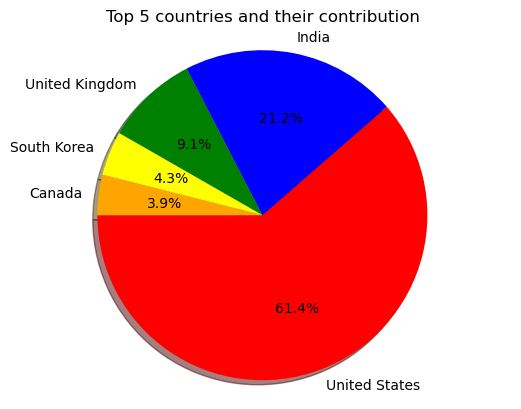

In [29]:
labels = top5_countrynames
values = top5_countries
colors = ['Red','Blue','Green','Yellow','Orange']
title('Top 5 countries and their contribution')
pie(values,labels=labels,colors=colors,shadow=True,startangle=180,autopct="%1.1f%%")
axis('equal')


{'2019': 2016, '2020': 1879, '2018': 1649, '2021': 1498, '2017': 1188, '2016': 429, '2015': 82, '2014': 24, '2011': 13, '2013': 11, '2012': 3, '2009': 2, '2008': 2, '2010': 1}
[1, 2, 2, 3, 11, 13, 24, 82, 429, 1188, 1498, 1649, 1879, 2016]
['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


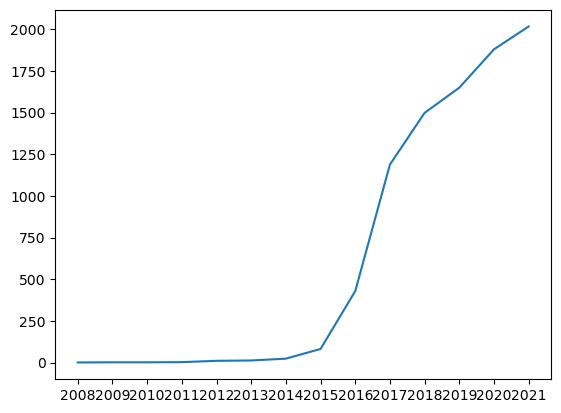

In [30]:
# Content addded throughout the years
j = dict(df['year_added'].value_counts())
print(j)
h = list(j.keys())
h.sort()
i = list(j.values())
i.sort()
print(i)
print(h)
plot(h,i)


### Ratings Bar Chart

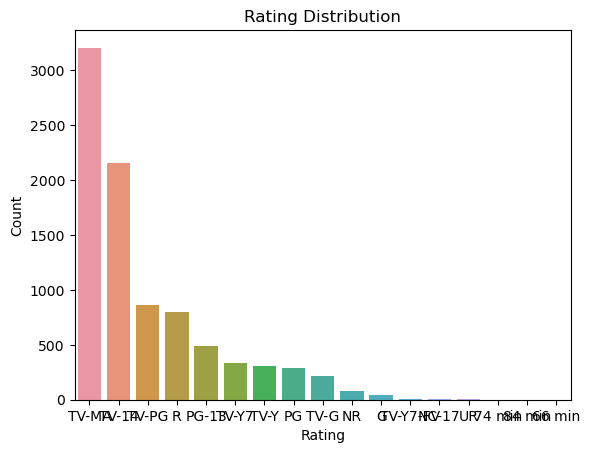

In [31]:
labels = df['rating'].astype(str).unique()

# Sort the DataFrame based on counts in decreasing order
sorted_df = df['rating'].value_counts().reset_index().rename(columns={'index': 'rating', 'rating': 'count'})
sorted_df = sorted_df.sort_values(by='count', ascending=False)

# Use Seaborn countplot for creating the bar chart
sns.barplot(x='rating', y='count', data=sorted_df, order=sorted_df['rating'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()

### Top 5 Directors

In [32]:
topD = dict(df['director'].value_counts())
print(topD)
names = list(topD.keys())

names = names[:5]
print(names)
values = list(topD.values())
values.sort

print(values)
values = values[:5]
print(values)

{'Rajiv Chilaka': 19, 'Raúl Campos, Jan Suter': 18, 'Marcus Raboy': 16, 'Suhas Kadav': 16, 'Jay Karas': 14, 'Cathy Garcia-Molina': 13, 'Martin Scorsese': 12, 'Youssef Chahine': 12, 'Jay Chapman': 12, 'Steven Spielberg': 11, 'Don Michael Paul': 10, 'David Dhawan': 9, 'Yılmaz Erdoğan': 8, 'Lance Bangs': 8, 'Kunle Afolayan': 8, 'Quentin Tarantino': 8, 'Ryan Polito': 8, 'Troy Miller': 8, 'Shannon Hartman': 8, 'Fernando Ayllón': 8, 'Robert Rodriguez': 8, 'Hakan Algül': 8, 'Johnnie To': 8, 'Ozan Açıktan': 7, 'Justin G. Dyck': 7, 'Omoni Oboli': 7, 'Clint Eastwood': 7, 'S.S. Rajamouli': 7, 'Hidenori Inoue': 7, 'Mae Czarina Cruz': 7, 'Ram Gopal Varma': 7, 'Prakash Satam': 7, 'McG': 7, 'Toshiya Shinohara': 7, 'Ron Howard': 7, 'Joey So': 6, 'Robert Vince': 6, 'Lasse Hallström': 6, 'Imtiaz Ali': 6, 'Steven Soderbergh': 6, 'David Fincher': 6, 'Matt Askem': 6, 'Anees Bazmee': 6, 'Ashutosh Gowariker': 6, 'Hanung Bramantyo': 6, 'Rajkumar Santoshi': 6, 'Noah Baumbach': 6, 'Vlad Yudin': 6, 'Robert Luket

(-1.1268095750466791,
 1.25891387596789,
 -1.1216310864800938,
 1.2298749611371307)

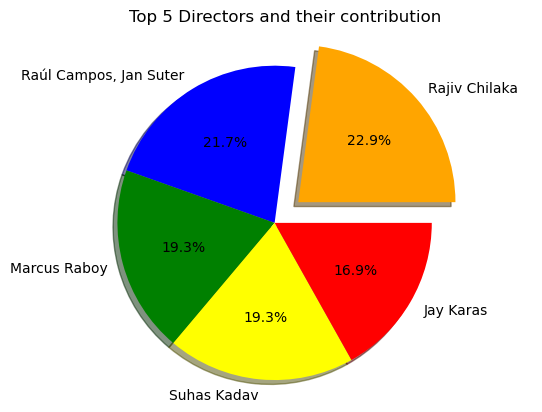

In [33]:
# Pie Chart
colors = ['Orange','Blue','Green','Yellow','Red']
pie(values,labels=names,colors=colors,shadow=True,explode=[0.2,0,0,0,0],autopct="%1.1f%%")
title('Top 5 Directors and their contribution')
axis('equal')

### Release year with highest content

(-1.1189992685910644,
 1.2839673456010745,
 -1.1031165249984614,
 1.1107876541376016)

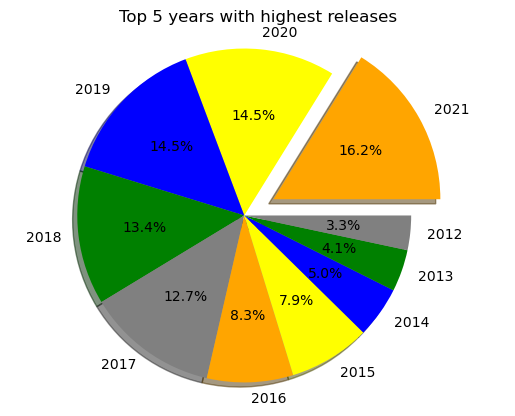

In [34]:
years = list(df['release_year'].unique())
years.sort()
years.reverse()
years = years[:10]
values = list(df['release_year'].value_counts())
values.sort()
values.reverse()
values = values[:10]
title('Top 5 years with highest releases')
pie(values,labels=years,colors=['Orange','Yellow','Blue',"Green",'Grey'],autopct="%1.1f%%",shadow=True,explode=[0.2,0,0,0,0,0,0,0,0,0])
axis('equal')